# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_house_price = pd.read_csv(r"D:\数据原料\house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 评估和清理数据

In [3]:
cleaded_house_price = original_house_price.copy()
cleaded_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 数据整齐度

In [4]:
cleaded_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


整齐，每一列有对应的只有一个变量

### 数据干净度

In [5]:
cleaded_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


不存在缺失值

数据类型方面，我们已知`mainroad`（是否位于主路）、`guestroom`（是否有客房）、`basement`（是否有地下室）、`hotwaterheating`（是否有热水器）、`airconditioning`（是否有空调）、`prefarea`（是否位于城市首选社区）、`furnishingstatus`（装修状态）都是分类数据，可以把数据类型都转换为Category。

In [6]:
cleaded_house_price['mainroad'] = cleaded_house_price['mainroad'].astype('category')
cleaded_house_price['guestroom'] = cleaded_house_price['guestroom'].astype('category')
cleaded_house_price['basement'] = cleaded_house_price['basement'].astype('category')
cleaded_house_price['hotwaterheating'] = cleaded_house_price['hotwaterheating'].astype('category')
cleaded_house_price['airconditioning'] = cleaded_house_price['airconditioning'].astype('category')
cleaded_house_price['prefarea'] = cleaded_house_price['prefarea'].astype('category')
cleaded_house_price['furnishingstatus'] = cleaded_house_price['furnishingstatus'].astype('category')

In [7]:
cleaded_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 处理缺失数据

info方法已经检测出不存在缺失值了

#### 处理重复数据

此数据可以存在重复数据

#### 处理不一致数据

不一致数据可能存在于分类数据中

In [8]:
cleaded_house_price['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
cleaded_house_price['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
cleaded_house_price['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
cleaded_house_price['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
cleaded_house_price['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
cleaded_house_price['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
cleaded_house_price['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

由此观之，不存在不一致数据

#### 处理无效或错误数据

In [15]:
cleaded_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


并不存在无效或错误数据

## 探索数据

在分析数据之前，可以对数据进行可视化处理，以好了解房价相关因素的一些相关性，对下一步建立回归方程模型提供方向

In [16]:
sns.set_palette('pastel')

### 房价分布

<Axes: ylabel='price'>

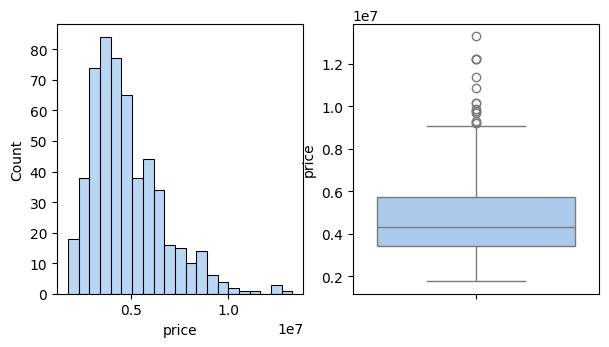

In [17]:
fig,axes = plt.subplots(1,2,figsize = (7.00,3.50))
sns.histplot(cleaded_house_price,x = 'price',ax = axes[0])
sns.boxplot(cleaded_house_price,y = 'price',ax = axes[1])

房价呈有偏态分布，是由极端高的房价给拉高了均值，大部分的房价都属于中等价格

### 面积分布

<Axes: ylabel='area'>

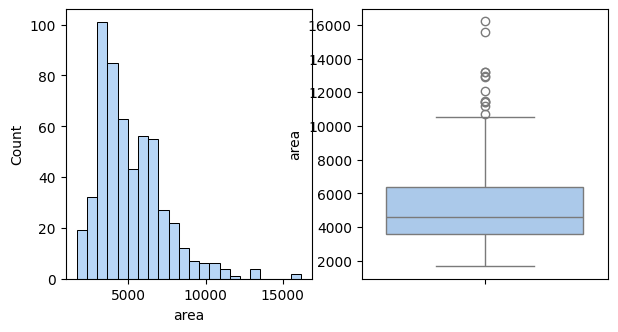

In [18]:
fig,axes = plt.subplots(1,2,figsize = (7,3.5))
sns.histplot(cleaded_house_price,x = 'area',ax = axes[0])
sns.boxplot(cleaded_house_price,y = 'area',ax = axes[1])

与房价类似，也是情理之中的，也呈右偏态分布

### 房价与面积的关系

<Axes: xlabel='area', ylabel='price'>

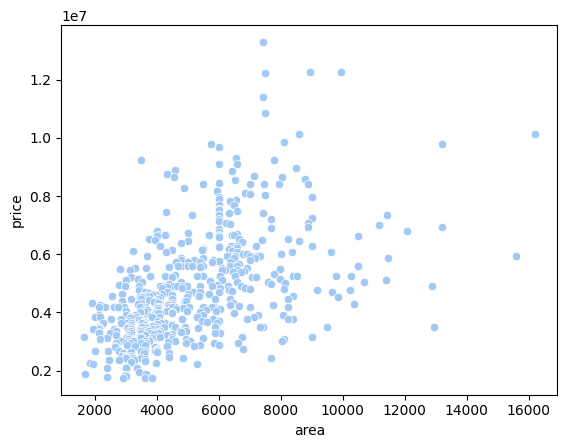

In [19]:
sns.scatterplot(cleaded_house_price,x = 'area',y = 'price')

从散点图来看，房价与面积是呈正相关的，但是具体的要根据计算相关性来得出结论

### 房价与卧室数的关系

<Axes: xlabel='bedrooms', ylabel='price'>

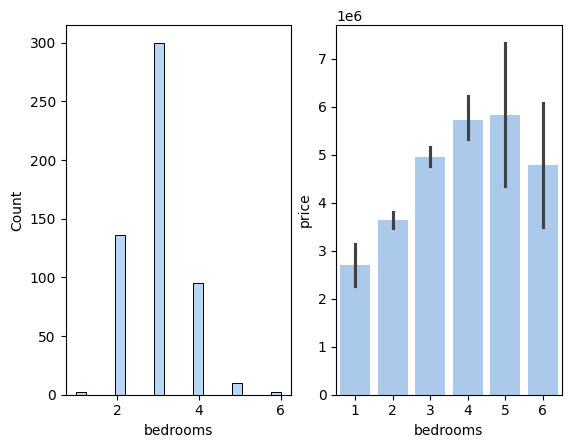

In [20]:
fig,axes = plt.subplots(1,2)
sns.histplot(cleaded_house_price,x = 'bedrooms',ax = axes[0])
sns.barplot(cleaded_house_price,x = 'bedrooms', y = 'price',ax = axes[1])

卧室数有1-6个，其中2-4个卧室数的房子较多，当卧室数小于5时，随着卧室数的增加，平均房价也随之上涨，大于5时就不一定了

### 厕所与房价

<Axes: xlabel='bathrooms', ylabel='price'>

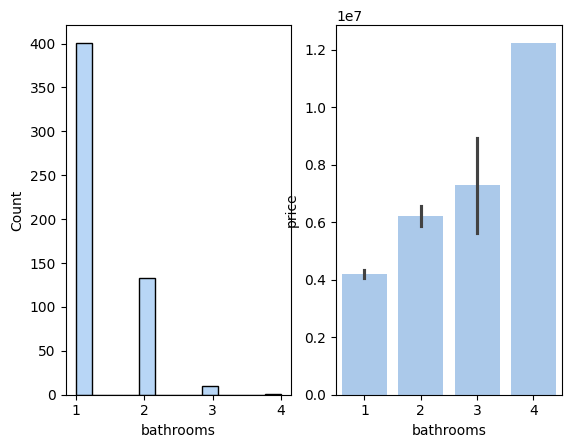

In [21]:
fig,axes = plt.subplots(1,2)
sns.histplot(cleaded_house_price,x = 'bathrooms',ax = axes[0])
sns.barplot(cleaded_house_price,x = 'bathrooms',y = 'price',ax = axes[1])

厕所数量有1-4个，其中1-2个厕所数量最多

条形图来看，平均房价随厕所数的增加而上涨

### 楼层数与房价

<Axes: xlabel='stories', ylabel='price'>

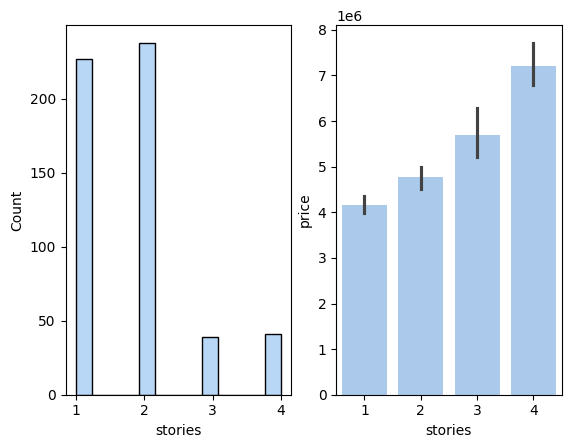

In [22]:
fig,axes = plt.subplots(1,2)
sns.histplot(cleaded_house_price,x = 'stories',ax = axes[0])
sns.barplot(cleaded_house_price,x = 'stories',y = 'price',ax = axes[1])

楼层数的范围为1-4楼，1-2楼的居多，其中2层楼最多

平均房价随楼层数的增加而上涨

### 车位数与房价

<Axes: xlabel='parking', ylabel='price'>

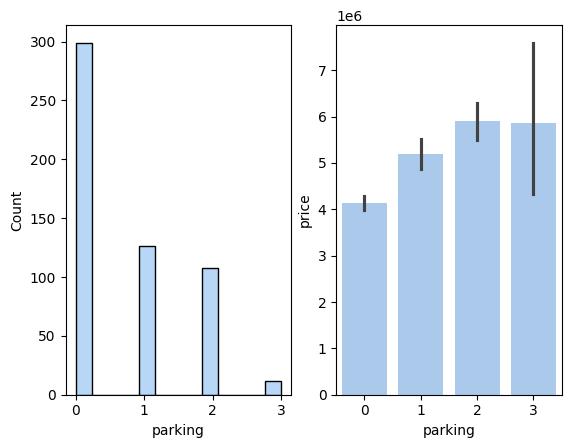

In [23]:
fig,axes = plt.subplots(1,2)
sns.histplot(cleaded_house_price,x = 'parking',ax = axes[0])
sns.barplot(cleaded_house_price,x = 'parking',y = 'price',ax = axes[1])

车位数有0-3个，其中0个车位最多

车位数小于2时，平均房价随车位数的增加而上涨，大于2时就不一定了

### 是否在主路与房价

<Axes: xlabel='mainroad', ylabel='price'>

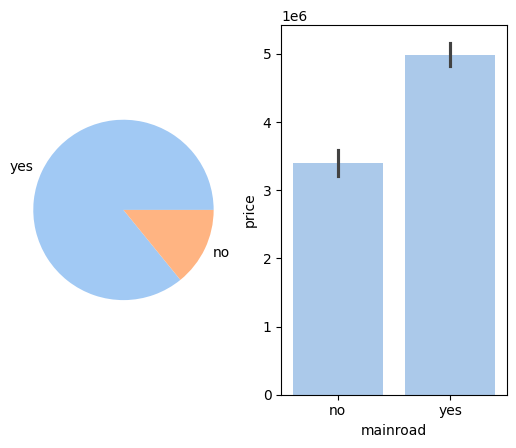

In [24]:
fig,axes = plt.subplots(1,2)
mainroad_count = cleaded_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count,labels = mainroad_label)
sns.barplot(cleaded_house_price,x = 'mainroad',y = 'price',ax = axes[1])

大多数都有主路

有主路的比没有主路的平均房价要高

### 是否有客人房与房价

<Axes: xlabel='guestroom', ylabel='price'>

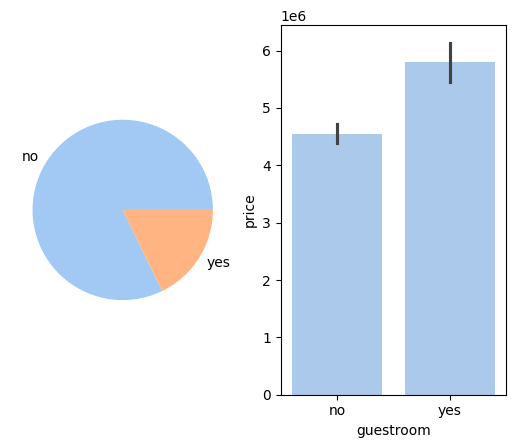

In [25]:
fig,axes = plt.subplots(1,2)
guestroom_count = cleaded_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count,labels = guestroom_label)
sns.barplot(cleaded_house_price,x = 'guestroom',y = 'price',ax = axes[1])

没有客人房的占大多数

有客人房比没有客人房的平均房价要高

### 是否有地下室与房价

<Axes: xlabel='basement', ylabel='price'>

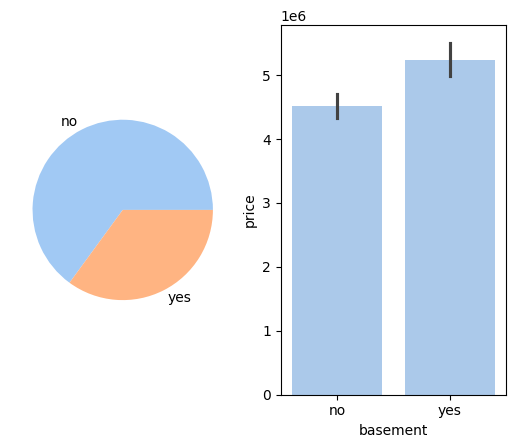

In [26]:
fig,axes = plt.subplots(1,2)
basement_count = cleaded_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count,labels = basement_label)
sns.barplot(cleaded_house_price,x = 'basement',y = 'price',ax = axes[1])

没有地下室的占比较多

有地下室的相比于没有地下室的平均房价相对较高

### 是否有热水器与房价

<Axes: xlabel='hotwaterheating', ylabel='price'>

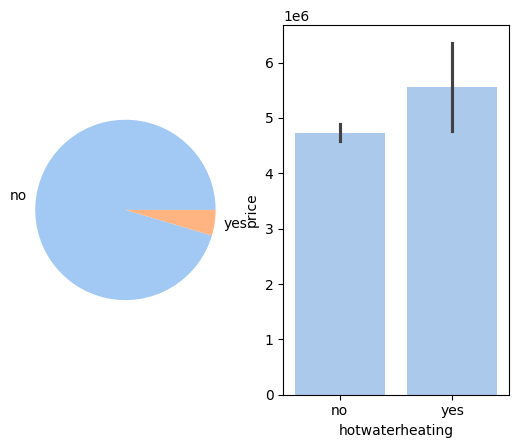

In [27]:
fig,axes = plt.subplots(1,2)
hotwaterheating_count = cleaded_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count,labels = hotwaterheating_label)
sns.barplot(cleaded_house_price,x = 'hotwaterheating',y = 'price',ax = axes[1])

没有热水器的房子占多数

有热水器的房子比没有热水器的房子其平均房价更高

### 是否有空调与房价

<Axes: xlabel='airconditioning', ylabel='price'>

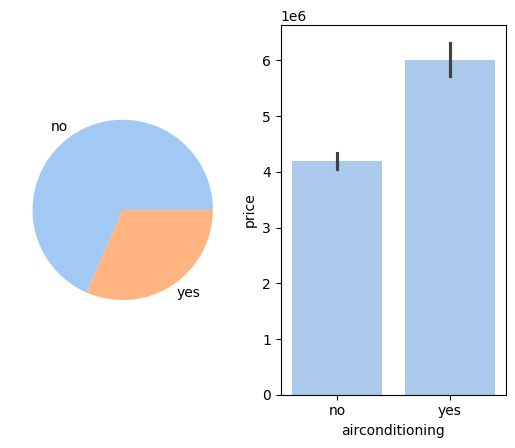

In [28]:
fig,axes = plt.subplots(1,2)
airconditioning_counts = cleaded_house_price['airconditioning'].value_counts()
airconditioning_label = airconditioning_counts.index
axes[0].pie(airconditioning_counts,labels = airconditioning_label)
sns.barplot(cleaded_house_price,x = 'airconditioning',y = 'price',ax = axes[1])

没有空调的房子占多数

有空调的房子的平均房价也更高

### 是否位于城市首选社区与房价

<Axes: xlabel='prefarea', ylabel='price'>

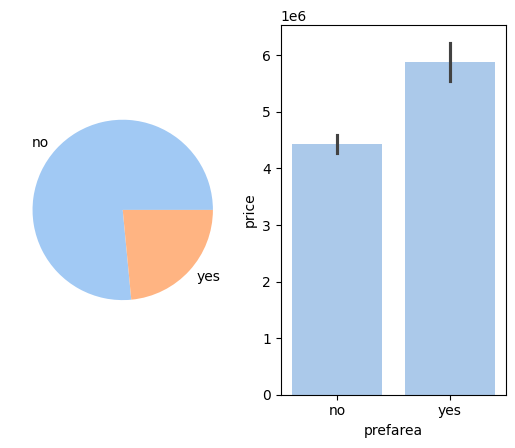

In [29]:
fig,axes = plt.subplots(1,2)
prefarea_count = cleaded_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count,labels = prefarea_label)
sns.barplot(cleaded_house_price,x = 'prefarea',y = 'price',ax = axes[1])

不是城市首选的社区的房子占比居多

是城市首选社区的房子的平均房价居高

### 装修状态与房价

<Axes: xlabel='furnishingstatus', ylabel='price'>

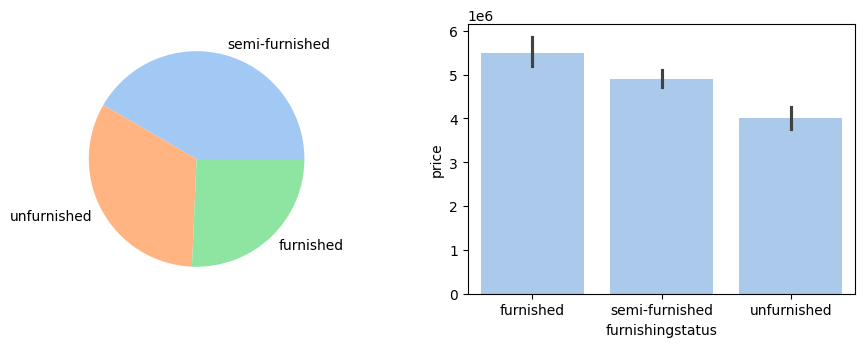

In [30]:
fig,axes = plt.subplots(1,2,figsize = (11,3.5))
furnishingstatus_count = cleaded_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels = furnishingstatus_label)
sns.barplot(cleaded_house_price,x = 'furnishingstatus',y = 'price',ax = axes[1])

也有另外一种表示方法

C:\Users\123\AppData\Local\Temp\ipykernel_48052\1415806037.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 45,horizontalalignment = 'right')


[Text(0, 0, 'furnished'),
 Text(1, 0, 'semi-furnished'),
 Text(2, 0, 'unfurnished')]

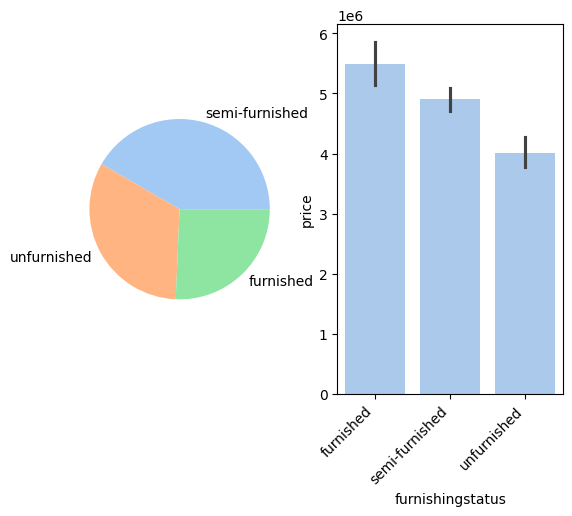

In [31]:
fig,axes = plt.subplots(1,2)
furnishingstatus_count = cleaded_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels = furnishingstatus_label)
sns.barplot(cleaded_house_price,x = 'furnishingstatus',y = 'price',ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 45,horizontalalignment = 'right')

此数据集中简装和毛坯的房子较多，1/4左右房子为精装。

从平均房价与装修状态之间的柱状图来看，精装的房子价格高于简装，简装高于毛坯

## 分析数据

In [32]:
import statsmodels.api as sm

In [33]:
lr_house_price = cleaded_house_price.copy()
lr_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


存在分类变量，无法建立线性回归模型，需要引入虚拟变量

In [34]:
lr_house_price = pd.get_dummies(lr_house_price,drop_first = True,columns = ['mainroad','guestroom',
                                                                           'basement','hotwaterheating',
                                                                           'airconditioning','prefarea',
                                                                           'furnishingstatus'],dtype = int )
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


把因变量和自变量划分出来

In [35]:
y = lr_house_price['price']

我们可以把除价格之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [45]:
X = lr_house_price.drop('price',axis = 1)

一般认为其绝对值大于0.8的会存在严重的共线性问题

In [46]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


从上面看来，都小于0.8，所以不存在共线问题

给模型的线性方程添加截距

In [47]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


调用OLS函数，利用最小二乘法来得到线性回归方程的参数值

In [48]:
model = sm.OLS(y,X).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          9.07e-123
Time:                        17:41:07   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

首先要去看P值是否大于规定的显著值0.05

模型认为卧室数，是否为简装房对房价没有显著价格，此外，还有线性回归方程的截距也没有显著影响

所以可以将之删除,然后再建立回归方程

In [50]:
X = X.drop(['const','bedrooms','furnishingstatus_semi-furnished'],axis = 1)

In [51]:
model = sm.OLS(y,X).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                        0.00
Time:                        17:41:21   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ok啦，当将P值较大的参数移除后，其R平方从0.6上升到了0.9，说明提高了模型对现有数据的拟合度

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

In [76]:
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。
price_to_predict = pd.DataFrame({'area':[6500],'bedrooms':[4],'bathrooms':[2],
                                'stories':[2],'mainroad':['yes'],'guestroom':['no'],
                               'basement':['yes'],'hotwaterheating':['no'],'airconditioning':['no'],
                                'parking':[2],'prefarea':['yes'],'furnishingstatus':['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,yes,no,yes,no,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [77]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'],categories = ['yes','no'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'],categories = ['yes','no'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'],categories = ['yes','no'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'],categories = ['yes','no'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'],categories = ['yes','no'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'],categories = ['yes','no'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'],categories = ['furnished','semi-furnished','unfurnished'])

对分类变量引入虚拟变量

In [78]:
price_to_predict = pd.get_dummies(price_to_predict,drop_first = True,
                                 columns = ['mainroad','guestroom',
                                            'basement','hotwaterheating',
                                            'airconditioning','prefarea',
                                            'furnishingstatus'],dtype = int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,1,0,1,1,0,1,0


In [79]:
price_to_predict = price_to_predict.drop(['bedrooms','furnishingstatus_semi-furnished'],axis = 1)

In [80]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.397294e+06
dtype: float64

所预测的房价为：7397294